In [1]:
import numpy as np
import scipy as ci 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML

import seaborn as sns 
import tables 
import pickle
import warnings
warnings.filterwarnings('once')

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

/Users/yang/miniconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.figure()
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update({'font.size': 12})
plt.rc('axes', axisbelow=True)

<Figure size 432x288 with 0 Axes>

In [3]:
lifetime = 86400*365 # 1 year! 
fig_dir = '/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/1_distribution_plots/plots/ana-1-3-' 
data_dir = '/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/'

In [11]:
with tables.open_file(data_dir+'corsika_h5/corsika.h5','r') as f: # 30000 high, 30000 low 

    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 18
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
    CUT_LdirC = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:] > 600
    CUT_balloon = f.root.Balloon.cols.InIceBalloonParameter[:] < 0.22
    CUT_multiplicity = f.root.TologicalCounterSplitCount.cols.value[:] == 1

    CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_LdirC & CUT_balloon & CUT_multiplicity
    
    chi2_corsika = f.root.Collection.cols.chi2[:][CUT]
    chi2_red_corsika = f.root.Collection.cols.chi2_red[:][CUT]
    stoch_corsika = f.root.Collection.cols.stoch[:][CUT]
    chi2_new_corsika = f.root.Collection.cols.chi2_new[:][CUT]
    chi2_red_new_corsika = f.root.Collection.cols.chi2_red_new[:][CUT]
    PeakOverMedian_corsika = f.root.Collection.cols.PeakOverMedian[:][CUT]
    PeakOverMean_corsika = f.root.Collection.cols.PeakOverMean[:][CUT]

    zenith_corsika = f.root.SplineMPE.cols.zenith[:][CUT]
    truncated_muon_e_corsika = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
    len_dedx_corsika = f.root.Collection.cols.len_dEdxVector[:][CUT]
    cascllh_corsika = f.root.CascadeLlhVertexFitParams.cols.rlogL[:][CUT]
    NPE_corsika = f.root.QTot.cols.value[:][CUT]
    Qtot_corsika = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    N_dom_corsika = f.root.Balloon.cols.N_Doms[:][CUT]
    N_pulses_corsika = f.root.Balloon.cols.N_Pulses[:][CUT]
    balloon_corsika = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
    balloon_adjusted_corsika = f.root.Balloon.cols.InIceBalloonParameter_adjusted[:][CUT]
    in_ice_total_charge_corsika = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    in_ice_total_charge_reduced_corsika = f.root.Balloon.cols.InIceTotalCharge_reduced[:][CUT]
    ndirdoms_corsika = f.root.SplineMPEDirectHitsC.cols.n_dir_doms[:][CUT]
    ndirpulses_corsika = f.root.SplineMPEDirectHitsC.cols.n_dir_pulses[:][CUT]
    topocount_corsika = f.root.TologicalCounterSplitCount.cols.value[:][CUT]
    wimpcount_corsika = f.root.WIMPrecoTopoSplitSplitCount.cols.value[:][CUT]
    cv_ndoms_corsika = f.root.CVMultiplicity.cols.n_hit_doms[:][CUT]
    cv_npulses_corsika = f.root.CVMultiplicity.cols.n_pulses[:][CUT]
    
    closest_d_corsika = f.root.Closest_approach_dist_to_nearest_IT_dom.cols.value[:][CUT]
    d_to_IC_center_corsika = f.root.Dist_to_IC_center.cols.value[:][CUT]
    d_to_IT_center_corsika = f.root.Dist_to_IT_center.cols.value[:][CUT]
    Ldir_corsika = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]
    coincidence_corsika = (f.root.PolyplopiaInfo.cols.Multiplicity[:][CUT] > 1).astype(int)
    prim_e_corsika = f.root.PolyplopiaPrimary.cols.energy[:][CUT]
    zenith_truth_corsika = f.root.PolyplopiaPrimary.cols.zenith[:][CUT]

    E_bundle_corsika = f.root.Bundle.cols.MuonBundleEnergy_Ei[:][CUT]
    E_leading_muon_corsika = f.root.Bundle.cols.MostEnergeticMuonEnergy_i[:][CUT]
    singleness_corsika = f.root.Bundle.cols.Singleness_Ei[:][CUT]
    bsize_corsika = f.root.Bundle.cols.Size_Ei[:][CUT]
    xf_corsika = E_bundle_corsika/prim_e_corsika
    E_shower_corsika = prim_e_corsika - E_bundle_corsika # surface shower
    
    runid_corsika = f.root.FileNumber.cols.value[:][CUT]
    eventid_corsika = f.root.FileNumber.cols.Event[:][CUT]
    
    A_corsika = f.root.PolyplopiaPrimary.cols.type[:][CUT]
    CUT_H = A_corsika == 2212
    CUT_He = A_corsika == 1000020040
    CUT_N= A_corsika == 1000070140
    CUT_Al = A_corsika == 1000130270
    CUT_Fe = A_corsika == 1000260560
    
    weight_corsika = f.root.Combined_Weight_H3a[:][CUT] * lifetime

    weight_corsika_H = np.sum(weight_corsika) * weight_corsika[CUT_H]/np.sum(weight_corsika[CUT_H])
    weight_corsika_He = np.sum(weight_corsika) * weight_corsika[CUT_He]/np.sum(weight_corsika[CUT_He])
    weight_corsika_N = np.sum(weight_corsika) * weight_corsika[CUT_N]/np.sum(weight_corsika[CUT_N])
    weight_corsika_Al = np.sum(weight_corsika) * weight_corsika[CUT_Al]/np.sum(weight_corsika[CUT_Al])
    weight_corsika_Fe = np.sum(weight_corsika) * weight_corsika[CUT_Fe]/np.sum(weight_corsika[CUT_Fe])

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


In [12]:
with tables.open_file('/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/nugen_h5/nugen_11374.h5','r') as f:
    n_file = 19017
    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 18
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
    CUT_LdirC = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:] > 600
    CUT_balloon = f.root.Balloon.cols.InIceBalloonParameter[:] < 0.22
    CUT_multiplicity = f.root.TologicalCounterSplitCount.cols.value[:] == 1
    CUT_coincident = f.root.MCPrimary_coincident.cols.value[:] == 0 # buggy weight distribution for coincidents!! 
    
    CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_LdirC & CUT_balloon & CUT_multiplicity & CUT_coincident
    
    chi2_red_numu = f.root.Collection.cols.chi2_red[:][CUT]
    stoch_numu = f.root.Collection.cols.stoch[:][CUT]
    chi2_red_new_numu = f.root.Collection.cols.chi2_red_new[:][CUT]
    PeakOverMedian_numu = f.root.Collection.cols.PeakOverMedian[:][CUT]

    zenith_numu = f.root.SplineMPE.cols.zenith[:][CUT]
    truncated_muon_e_numu = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
    len_dedx_numu = f.root.Collection.cols.len_dEdxVector[:][CUT]
    cascllh_numu = f.root.CascadeLlhVertexFitParams.cols.rlogL[:][CUT]
    NPE_numu = f.root.QTot.cols.value[:][CUT]
    Qtot_numu = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    N_dom_numu = f.root.Balloon.cols.N_Doms[:][CUT]
    N_pulses_numu = f.root.Balloon.cols.N_Pulses[:][CUT]
    balloon_numu = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
    balloon_adjusted_numu = f.root.Balloon.cols.InIceBalloonParameter_adjusted[:][CUT]
    in_ice_total_charge_numu = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    in_ice_total_charge_reduced_numu = f.root.Balloon.cols.InIceTotalCharge_reduced[:][CUT]
    ndirdoms_numu = f.root.SplineMPEDirectHitsC.cols.n_dir_doms[:][CUT]
    ndirpulses_numu = f.root.SplineMPEDirectHitsC.cols.n_dir_pulses[:][CUT]
    topocount_numu = f.root.TologicalCounterSplitCount.cols.value[:][CUT]
    wimpcount_numu = f.root.WIMPrecoTopoSplitSplitCount.cols.value[:][CUT]
    cv_ndoms_numu = f.root.CVMultiplicity.cols.n_hit_doms[:][CUT]
    cv_npulses_numu = f.root.CVMultiplicity.cols.n_pulses[:][CUT]
    closest_d_numu = f.root.Closest_approach_dist_to_nearest_IT_dom.cols.value[:][CUT]
    d_to_IC_center_numu = f.root.Dist_to_IC_center.cols.value[:][CUT]
    d_to_IT_center_numu = f.root.Dist_to_IT_center.cols.value[:][CUT]
    Ldir_numu = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]
    coincidence_numu = f.root.MCPrimary_coincident.cols.value[:][CUT]
    prim_e_numu = f.root.MCPrimary_new.cols.energy[:][CUT]
    zenith_truth_numu = f.root.MCPrimary_new.cols.zenith[:][CUT]

    weight_numu_conv = f.root.weight_honda2006[:][CUT] * lifetime/n_file 
    weight_numu_prompt = f.root.weight_BERSS_H3p_central[:][CUT] * lifetime/n_file 

    ### astrophysical ###
    energy = f.root.MCPrimary_new.cols.energy[:][CUT]
    OneWeight = f.root.I3MCWeightDict.cols.OneWeight[:][CUT]
    NEvents = f.root.I3MCWeightDict.cols.NEvents[:][CUT]
    weight_numu_astro = (6.7 * 10**(-18))/6 * (energy/10**5)**(-2) * OneWeight/(n_file * NEvents) * lifetime * 2  # 10**5: 100 TeV. 2 is nu+nubar

    runid_numu = f.root.FileNumber.cols.value[:][CUT]
    eventid_numu = f.root.FileNumber.cols.Event[:][CUT]  

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


In [7]:
np.sum(weight_numu_astro)

5.987111679341989

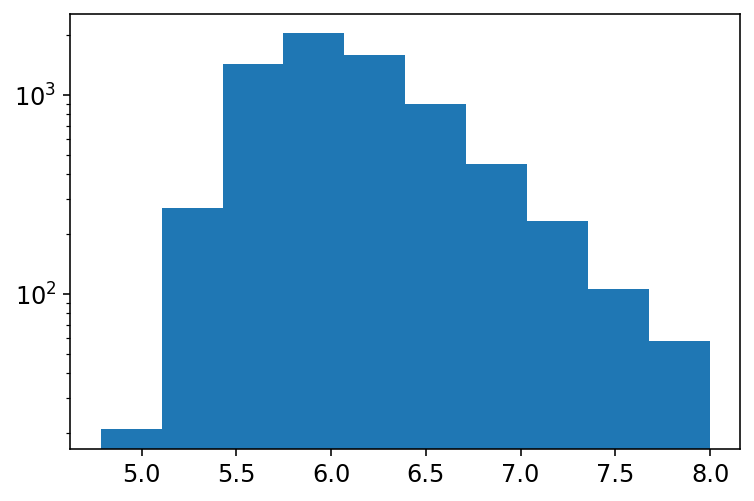

In [10]:
plt.hist(np.log10(prim_e_numu),log=True)
plt.show()

In [7]:
with tables.open_file('/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/nugen_h5/nugen_11981.h5','r') as f:
    n_file = 19996
    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 18
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
    CUT_LdirC = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:] > 600
    CUT_balloon = f.root.Balloon.cols.InIceBalloonParameter[:] < 0.22
    CUT_multiplicity = f.root.TologicaalCounterSplitCount.cols.value[:] == 1
    CUT_coincident = f.root.MCPrimary_coincident.cols.value[:] == 0 # buggy weight distribution for coincidents!! 
    
    CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_LdirC & CUT_balloon & CUT_multiplicity & CUT_coincident
    
    chi2_red_nue = f.root.Collection.cols.chi2_red[:][CUT]
    stoch_nue = f.root.Collection.cols.stoch[:][CUT]
    chi2_red_new_nue = f.root.Collection.cols.chi2_red_new[:][CUT]
    PeakOverMedian_nue = f.root.Collection.cols.PeakOverMedian[:][CUT]

    zenith_nue = f.root.SplineMPE.cols.zenith[:][CUT]
    truncated_muon_e_nue = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
    len_dedx_nue = f.root.Collection.cols.len_dEdxVector[:][CUT]
    cascllh_nue = f.root.CascadeLlhVertexFitParams.cols.rlogL[:][CUT]
    NPE_nue = f.root.QTot.cols.value[:][CUT]
    Qtot_nue = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    N_dom_nue = f.root.Balloon.cols.N_Doms[:][CUT]
    N_pulses_nue = f.root.Balloon.cols.N_Pulses[:][CUT]
    balloon_nue = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
    balloon_adjusted_nue = f.root.Balloon.cols.InIceBalloonParameter_adjusted[:][CUT]
    in_ice_total_charge_nue = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    in_ice_total_charge_reduced_nue = f.root.Balloon.cols.InIceTotalCharge_reduced[:][CUT]
    ndirdoms_nue = f.root.SplineMPEDirectHitsC.cols.n_dir_doms[:][CUT]
    ndirpulses_nue = f.root.SplineMPEDirectHitsC.cols.n_dir_pulses[:][CUT]
    topocount_nue = f.root.TologicalCounterSplitCount.cols.value[:][CUT]
    wimpcount_nue = f.root.WIMPrecoTopoSplitSplitCount.cols.value[:][CUT]
    cv_ndoms_nue = f.root.CVMultiplicity.cols.n_hit_doms[:][CUT]
    cv_npulses_nue = f.root.CVMultiplicity.cols.n_pulses[:][CUT]
    closest_d_nue = f.root.Closest_approach_dist_to_nearest_IT_dom.cols.value[:][CUT]
    d_to_IC_center_nue = f.root.Dist_to_IC_center.cols.value[:][CUT]
    d_to_IT_center_nue = f.root.Dist_to_IT_center.cols.value[:][CUT]
    Ldir_nue = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]
    coincidence_nue = f.root.MCPrimary_coincident.cols.value[:][CUT]
    prim_e_nue = f.root.MCPrimary_new.cols.energy[:][CUT]
    
    weight_nue_conv = f.root.weight_honda2006[:][CUT] * lifetime/n_file 
    weight_nue_prompt = f.root.weight_BERSS_H3p_central[:][CUT] * lifetime/n_file 

    ### astrophysical ###
    energy = f.root.MCPrimary_new.cols.energy[:][CUT]
    OneWeight = f.root.I3MCWeightDict.cols.OneWeight[:][CUT]
    NEvents = f.root.I3MCWeightDict.cols.NEvents[:][CUT]
    weight_nue_astro = (6.7 * 10**(-18))/6 * (energy/10**5)**(-2) * OneWeight/(n_file * NEvents) * lifetime * 2  # 10**5: 100 TeV. 2 is nu+nubar

    runid_nue = f.root.FileNumber.cols.value[:][CUT]
    eventid_nue = f.root.FileNumber.cols.Event[:][CUT]    

NoSuchNodeError: group ``/`` does not have a child named ``TologicaalCounterSplitCount``

In [ ]:
with tables.open_file('/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/nugen_h5/nugen_11477.h5','r') as f:
    n_file = 19914
    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 18
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
    CUT_LdirC = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:] > 600
    CUT_balloon = f.root.Balloon.cols.InIceBalloonParameter[:] < 0.22
    CUT_multiplicity = f.root.TologicalCounterSplitCount.cols.value[:] == 1
    CUT_coincident = f.root.MCPrimary_coincident.cols.value[:] == 0 # buggy weight distribution for coincidents!! 
    
    CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_LdirC & CUT_balloon & CUT_multiplicity & CUT_coincident
    
    chi2_red_nutau = f.root.Collection.cols.chi2_red[:][CUT]
    stoch_nutau = f.root.Collection.cols.stoch[:][CUT]
    chi2_red_new_nutau = f.root.Collection.cols.chi2_red_new[:][CUT]
    PeakOverMedian_nutau = f.root.Collection.cols.PeakOverMedian[:][CUT]

    zenith_nutau = f.root.SplineMPE.cols.zenith[:][CUT]
    truncated_muon_e_nutau = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
    len_dedx_nutau = f.root.Collection.cols.len_dEdxVector[:][CUT]
    cascllh_nutau = f.root.CascadeLlhVertexFitParams.cols.rlogL[:][CUT]
    NPE_nutau = f.root.QTot.cols.value[:][CUT]
    Qtot_nutau = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    N_dom_nutau = f.root.Balloon.cols.N_Doms[:][CUT]
    N_pulses_nutau = f.root.Balloon.cols.N_Pulses[:][CUT]
    balloon_nutau = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
    balloon_adjusted_nutau = f.root.Balloon.cols.InIceBalloonParameter_adjusted[:][CUT]
    in_ice_total_charge_nutau = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    in_ice_total_charge_reduced_nutau = f.root.Balloon.cols.InIceTotalCharge_reduced[:][CUT]
    ndirdoms_nutau = f.root.SplineMPEDirectHitsC.cols.n_dir_doms[:][CUT]
    ndirpulses_nutau = f.root.SplineMPEDirectHitsC.cols.n_dir_pulses[:][CUT]
    topocount_nutau = f.root.TologicalCounterSplitCount.cols.value[:][CUT]
    wimpcount_nutau = f.root.WIMPrecoTopoSplitSplitCount.cols.value[:][CUT]
    cv_ndoms_nutau = f.root.CVMultiplicity.cols.n_hit_doms[:][CUT]
    cv_npulses_nutau = f.root.CVMultiplicity.cols.n_pulses[:][CUT]
    closest_d_nutau = f.root.Closest_approach_dist_to_nearest_IT_dom.cols.value[:][CUT]
    d_to_IC_center_nutau = f.root.Dist_to_IC_center.cols.value[:][CUT]
    d_to_IT_center_nutau = f.root.Dist_to_IT_center.cols.value[:][CUT]
    Ldir_nutau = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]
    coincidence_nutau = f.root.MCPrimary_coincident.cols.value[:][CUT]
    prim_e_nutau = f.root.MCPrimary_new.cols.energy[:][CUT]

    ### astrophysical ### 
    energy = f.root.MCPrimary_new.cols.energy[:][CUT]
    OneWeight = f.root.I3MCWeightDict.cols.OneWeight[:][CUT]
    NEvents = f.root.I3MCWeightDict.cols.NEvents[:][CUT]
    weight_nutau_astro = (6.7 * 10**(-18))/6 * (energy/10**5)**(-2) * OneWeight/(n_file * NEvents) * lifetime * 2  # 10**5: 100 TeV. 2 is nu+nubar
    

In [ ]:
with tables.open_file(data_dir+'data_h5/data_burn.h5','r') as f:
    nfile_data = [2831731.134,3081951.304,3158084.037,3155703.188,3082765.564]

    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 18
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
    CUT_LdirC = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:] > 600
    CUT_balloon = f.root.Balloon.cols.InIceBalloonParameter[:] < 0.22
    CUT_multiplicity = f.root.TologicalCounterSplitCount.cols.value[:] == 1

    CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_LdirC & CUT_balloon & CUT_multiplicity
    
    chi2_data_burn = f.root.Collection.cols.chi2[:][CUT]
    chi2_red_data_burn = f.root.Collection.cols.chi2_red[:][CUT]
    chi2_new_data_burn = f.root.Collection.cols.chi2_new[:][CUT]
    chi2_red_new_data_burn = f.root.Collection.cols.chi2_red_new[:][CUT]
    PeakOverMedian_data_burn = f.root.Collection.cols.PeakOverMedian[:][CUT]
    PeakOverMean_data_burn = f.root.Collection.cols.PeakOverMean[:][CUT]
    stoch_data_burn = (chi2_red_data_burn + (np.log10(PeakOverMedian_data_burn)/2))/np.sqrt(2)
    stoch_new_data_burn = np.log10(chi2_red_new_data_burn)/8 + np.log10(PeakOverMedian_data_burn)
    
    zenith_data_burn = f.root.SplineMPE.cols.zenith[:][CUT]
    truncated_muon_e_data_burn = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
    len_dedx_data_burn = f.root.Collection.cols.len_dEdxVector[:][CUT]
    cascllh_data_burn = f.root.CascadeLlhVertexFitParams.cols.rlogL[:][CUT]
    NPE_data_burn = f.root.QTot.cols.value[:][CUT]
    Qtot_data_burn = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    N_dom_data_burn = f.root.Balloon.cols.N_Doms[:][CUT]
    N_pulses_data_burn = f.root.Balloon.cols.N_Pulses[:][CUT]
    balloon_data_burn = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
    balloon_adjusted_data_burn = f.root.Balloon.cols.InIceBalloonParameter_adjusted[:][CUT]
    in_ice_total_charge_data_burn = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    in_ice_total_charge_reduced_data_burn = f.root.Balloon.cols.InIceTotalCharge_reduced[:][CUT]
    ndirdoms_data_burn = f.root.SplineMPEDirectHitsC.cols.n_dir_doms[:][CUT]
    ndirpulses_data_burn = f.root.SplineMPEDirectHitsC.cols.n_dir_pulses[:][CUT]
    topocount_data_burn = f.root.TologicalCounterSplitCount.cols.value[:][CUT]
    wimpcount_data_burn = f.root.WIMPrecoTopoSplitSplitCount.cols.value[:][CUT]
    cv_ndoms_data_burn = f.root.CVMultiplicity.cols.n_hit_doms[:][CUT]
    cv_npulses_data_burn = f.root.CVMultiplicity.cols.n_pulses[:][CUT]

    closest_d_data_burn = f.root.Closest_approach_dist_to_nearest_IT_dom.cols.value[:][CUT]
    d_to_IC_center_data_burn = f.root.Dist_to_IC_center.cols.value[:][CUT]
    d_to_IT_center_data_burn = f.root.Dist_to_IT_center.cols.value[:][CUT]
    Ldir_data_burn = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]

    IT_Npulse_data_burn = f.root.IT_veto_double.cols.num_Total_hits[:][CUT]
    Npulse_in_window_data_burn = f.root.IT_veto_double.cols.num_correlated_Total_hits_in_window[:][CUT]
    Npulse_off_window_data_burn = f.root.IT_veto_double.cols.num_correlated_Total_hits_off_window[:][CUT]

    passed_2_data_burn = (f.root.IT_veto_double.cols.flag_window_2[:][CUT]).astype(bool) # 1 if passed 
    vetoed_2_data_burn = (1 - f.root.IT_veto_double.cols.flag_window_2[:][CUT]).astype(bool) 

    runid_data_burn = f.root.I3EventHeader.cols.Run[:][CUT]
    eventid_data_burn = f.root.I3EventHeader.cols.Event[:][CUT]

#     weight_data_burn = lifetime/np.sum(nfile_data) * np.ones(len(zenith_data_burn))
    weight_data_burn = np.sum(weight_corsika)/np.sum(np.ones_like(zenith_data_burn)) * np.ones_like(zenith_data_burn)


# angular + energy resolution

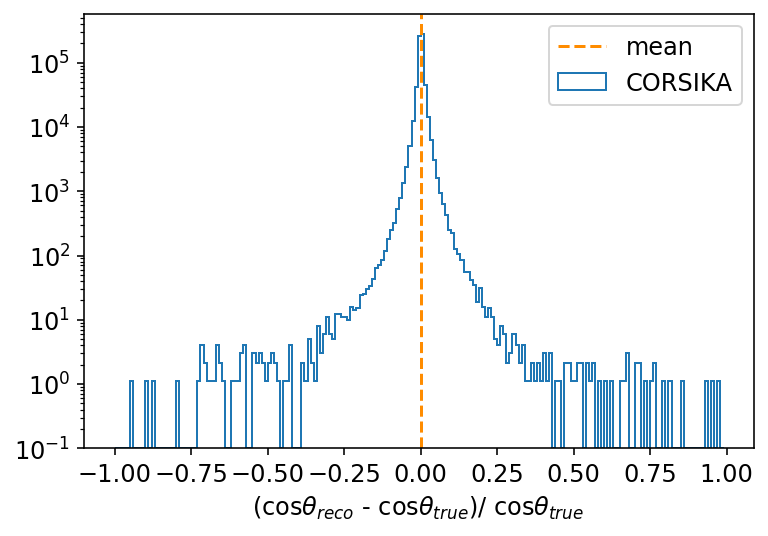

In [189]:
plt.hist((np.cos(zenith_corsika)-np.cos(zenith_truth_corsika))/np.cos(zenith_truth_corsika),bins=np.arange(-1,1,0.01),log=True,histtype='step',label='CORSIKA',bottom=1e-1)
plt.axvline(np.mean((np.cos(zenith_corsika)-np.cos(zenith_truth_corsika))/np.cos(zenith_truth_corsika)),ls='--',color='darkorange',label='mean')
plt.xlabel(r'(cos$\theta_{reco}$ - cos$\theta_{true}$)/ cos$\theta_{true}$ ')
plt.legend()
plt.show()

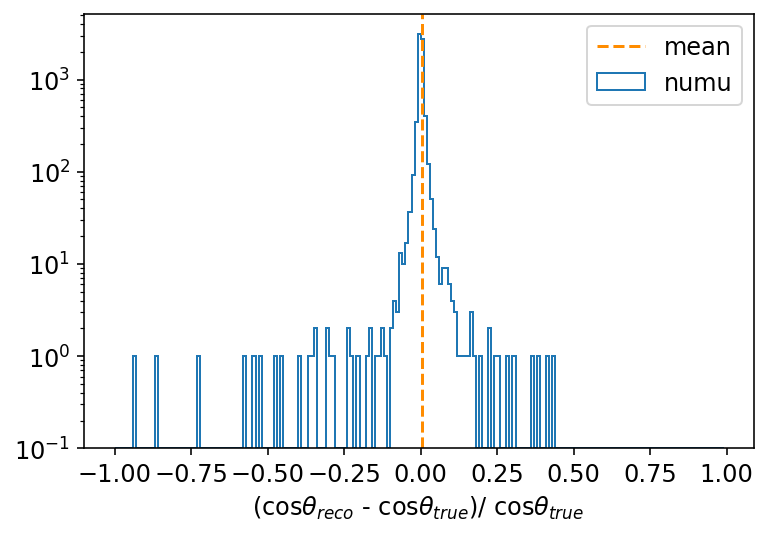

In [190]:
plt.hist((np.cos(zenith_numu)-np.cos(zenith_truth_numu))/np.cos(zenith_truth_numu),bins=np.arange(-1,1,0.01),log=True,histtype='step',label='numu')
plt.axvline(np.mean((np.cos(zenith_numu)-np.cos(zenith_truth_numu))/np.cos(zenith_truth_numu)),ls='--',color='darkorange',label='mean')
plt.xlabel(r'(cos$\theta_{reco}$ - cos$\theta_{true}$)/ cos$\theta_{true}$ ')
plt.legend()
plt.show()

In [191]:
cut = (np.cos(zenith_numu)-np.cos(zenith_truth_numu))/np.cos(zenith_truth_numu) < -0.25

np.cos(zenith_numu)[cut]

array([0.00701498, 0.00644546, 0.01020146, 0.06308112, 0.01536592,
       0.00505882, 0.0006331 , 0.00115756, 0.00817914, 0.00373931,
       0.00326035, 0.0053624 , 0.00346716, 0.04235871, 0.18492536,
       0.00256964, 0.14310223, 0.00247364, 0.00267485, 0.02105718])

In [197]:
cut = (np.cos(zenith_corsika)-np.cos(zenith_truth_corsika))/np.cos(zenith_truth_corsika) < -0.75

np.cos(zenith_corsika)[cut]

array([0.05251585, 0.06043693, 0.02103352, 0.0770111 ])

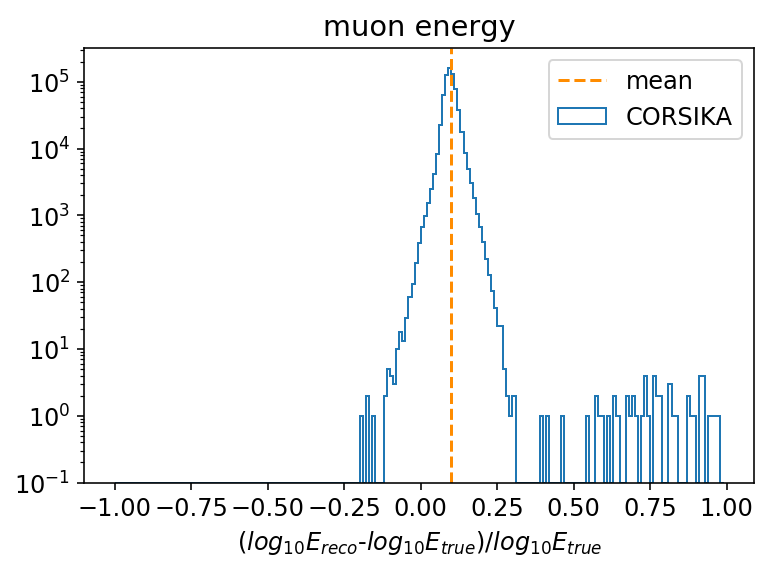

In [122]:
plt.hist((np.log10(truncated_muon_e_corsika)-np.log10(E_bundle_corsika))/np.log10(E_bundle_corsika),bins=np.arange(-1,1,0.01),log=True,histtype='step',label='CORSIKA')
plt.axvline(np.mean((np.log10(truncated_muon_e_corsika)-np.log10(E_bundle_corsika))/np.log10(E_bundle_corsika)),ls='--',color='darkorange',label='mean')
plt.xlabel('($log_{10}E_{reco}$-$log_{10}E_{true}$)/$log_{10}E_{true}$')
plt.title('muon energy')
plt.legend()
plt.show()

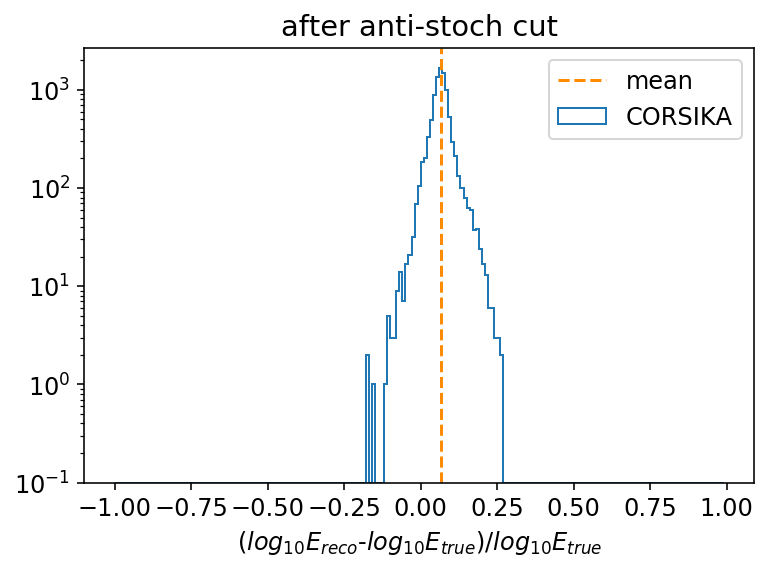

In [126]:
cut = np.log10(chi2_red_new_corsika) > 2
plt.hist((np.log10(truncated_muon_e_corsika[cut])-np.log10(E_bundle_corsika[cut]))/np.log10(E_bundle_corsika[cut]),bins=np.arange(-1,1,0.01),log=True,histtype='step',label='CORSIKA')
plt.axvline(np.mean((np.log10(truncated_muon_e_corsika[cut])-np.log10(E_bundle_corsika[cut]))/np.log10(E_bundle_corsika[cut])),ls='--',color='darkorange',label='mean')
plt.xlabel('($log_{10}E_{reco}$-$log_{10}E_{true}$)/$log_{10}E_{true}$')
plt.title('after anti-stoch cut')
plt.legend()
plt.show()

In [101]:
var = (np.log10(truncated_muon_e_corsika[cut])-np.log10(E_bundle_corsika[cut]))/np.log10(E_bundle_corsika[cut])
print(np.mean(var))
print(np.std(var))

0.10063119377491386
0.02650890847681208


In [102]:
print(np.mean((np.log10(truncated_muon_e_corsika)-np.log10(E_bundle_corsika))/np.log10(E_bundle_corsika)))

0.09800225544283825


# primary energy distribution

In [198]:
def makeplot(var,mybins,name):

    plt.figure(figsize=(7,7))

    plt.hist(var[0],bins=mybins,log=True,histtype='step',lw=2,label='CORSIKA',weights=weight_corsika,bottom=10**(-6),color='dodgerblue')
    plt.hist(var[1],bins=mybins,log=True,histtype='step',lw=2,label=r'astro $\nu_{\mu}$',weights=weight_numu_astro,bottom=10**(-6),color='darkorange')
    plt.hist(var[2],bins=mybins,log=True,histtype='step',lw=2,linestyle='--',label=r'conv $\nu_{\mu}$',weights=weight_numu_conv,bottom=10**(-6),color='darkorange')
    plt.hist(var[3],bins=mybins,log=True,histtype='step',lw=2,linestyle=':',label=r'prompt $\nu_{\mu}$',weights=weight_numu_prompt,bottom=10**(-6),color='darkorange')
    plt.hist(var[4],bins=mybins,log=True,histtype='step',lw=2,label=r'astro $\nu_e$',weights=weight_nue_astro,bottom=10**(-6),color='forestgreen')
    plt.hist(var[5],bins=mybins,log=True,histtype='step',lw=2,linestyle='--',label=r'conv $\nu_{e}$',weights=weight_nue_conv,bottom=10**(-6),color='forestgreen')
    plt.hist(var[6],bins=mybins,log=True,histtype='step',lw=2,linestyle=':',label=r'prompt $\nu_{e}$',weights=weight_nue_prompt,bottom=10**(-6),color='forestgreen')
    plt.hist(var[7],bins=mybins,log=True,histtype='step',lw=2,label=r'astro $\nu_{\tau}$',weights=weight_nutau_astro,bottom=10**(-6),color='orchid')

    plt.xlabel(name)
    plt.ylabel('Events in 365 days')
#     plt.xlim(np.min(mybins),np.max(mybins))
    plt.ylim(10**(-5),10**6)
    plt.legend(loc='best',prop={'size': 10})
    plt.grid(True,which='both',zorder=0,alpha=0.3)

#     ax = plt.axes()
#     ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
#     ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

    # plt.savefig(fig_dir+'hist1d_chi2_red.png',bbox_inches='tight',dpi=300)
    # plt.savefig(fig_dir+'hist1d_chi2_red.pdf',bbox_inches='tight')


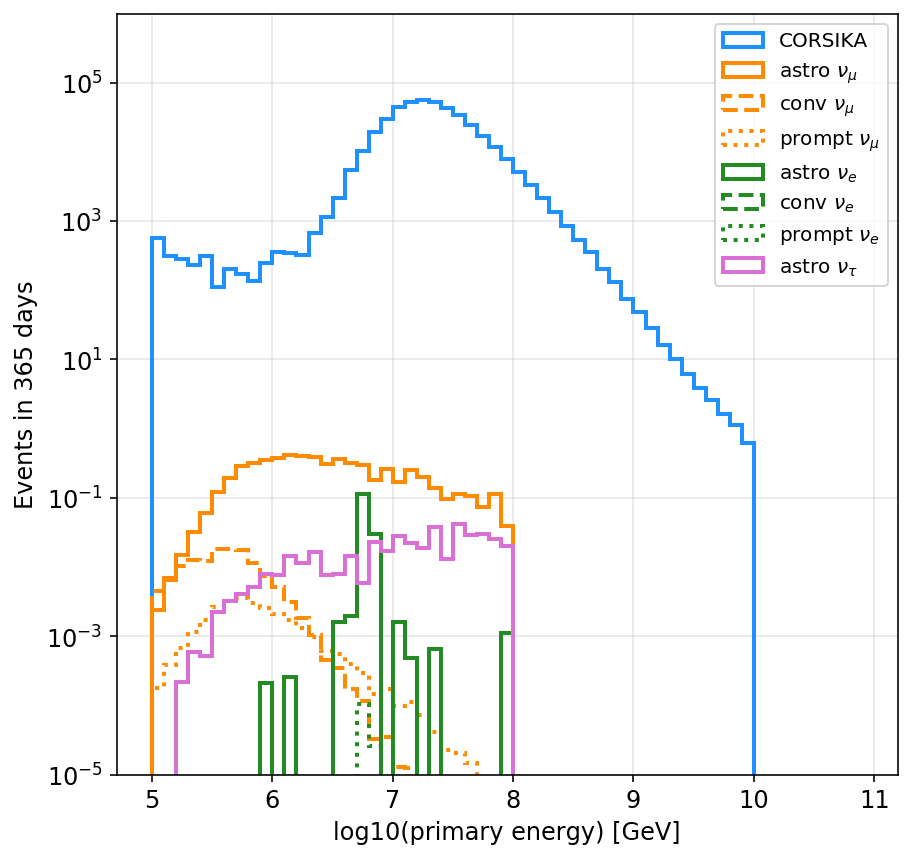

In [199]:
makeplot([np.log10(prim_e_corsika),
          np.log10(prim_e_numu),
          np.log10(prim_e_numu),
          np.log10(prim_e_numu),
          np.log10(prim_e_nue),
          np.log10(prim_e_nue),
          np.log10(prim_e_nue),
          np.log10(prim_e_nutau) 
        ], mybins = np.arange(5,11,0.1), name='log10(primary energy) [GeV]')

# Physics Vars Distributions

In [200]:
def makeplot(var,mybins,name):

    plt.figure(figsize=(7,7))

    plt.hist(var[0],bins=mybins,log=True,histtype='step',lw=2,label='CORSIKA',weights=weight_corsika,bottom=10**(-6),color='dodgerblue')
    plt.hist(var[1],bins=mybins,log=True,histtype='step',lw=2,label=r'astro $\nu_{\mu}$',weights=weight_numu_astro,bottom=10**(-6),color='darkorange')
    plt.hist(var[2],bins=mybins,log=True,histtype='step',lw=2,linestyle='--',label=r'conv $\nu_{\mu}$',weights=weight_numu_conv,bottom=10**(-6),color='darkorange')
    plt.hist(var[3],bins=mybins,log=True,histtype='step',lw=2,linestyle=':',label=r'prompt $\nu_{\mu}$',weights=weight_numu_prompt,bottom=10**(-6),color='darkorange')
    plt.hist(var[4],bins=mybins,log=True,histtype='step',lw=2,label=r'astro $\nu_e$',weights=weight_nue_astro,bottom=10**(-6),color='forestgreen')
    plt.hist(var[5],bins=mybins,log=True,histtype='step',lw=2,linestyle='--',label=r'conv $\nu_{e}$',weights=weight_nue_conv,bottom=10**(-6),color='forestgreen')
    plt.hist(var[6],bins=mybins,log=True,histtype='step',lw=2,linestyle=':',label=r'prompt $\nu_{e}$',weights=weight_nue_prompt,bottom=10**(-6),color='forestgreen')
    plt.hist(var[7],bins=mybins,log=True,histtype='step',lw=2,label=r'astro $\nu_{\tau}$',weights=weight_nutau_astro,bottom=10**(-6),color='orchid')

    h,b = np.histogram(var[8],bins=mybins,weights = weight_data_burn)
#     plt.plot((b[1:]+b[:-1])/2,h,'o',alpha=1,label='data burn',color='black')
    plt.errorbar((b[1:]+b[:-1])/2,h,fmt='o',yerr=weight_data_burn[0]*np.sqrt(h),capsize=3,alpha=1,label='data burn',color='black')


    plt.xlabel(name)
    plt.ylabel('Events in 365 days')
#     plt.xlim(np.min(mybins),np.max(mybins))
    plt.ylim(10**(-5),10**6)
    plt.legend(loc='best',prop={'size': 10})
    plt.grid(True,which='both',zorder=0,alpha=0.3)

#     ax = plt.axes()
#     ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
#     ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

    # plt.savefig(fig_dir+'hist1d_chi2_red.png',bbox_inches='tight',dpi=300)
    # plt.savefig(fig_dir+'hist1d_chi2_red.pdf',bbox_inches='tight')


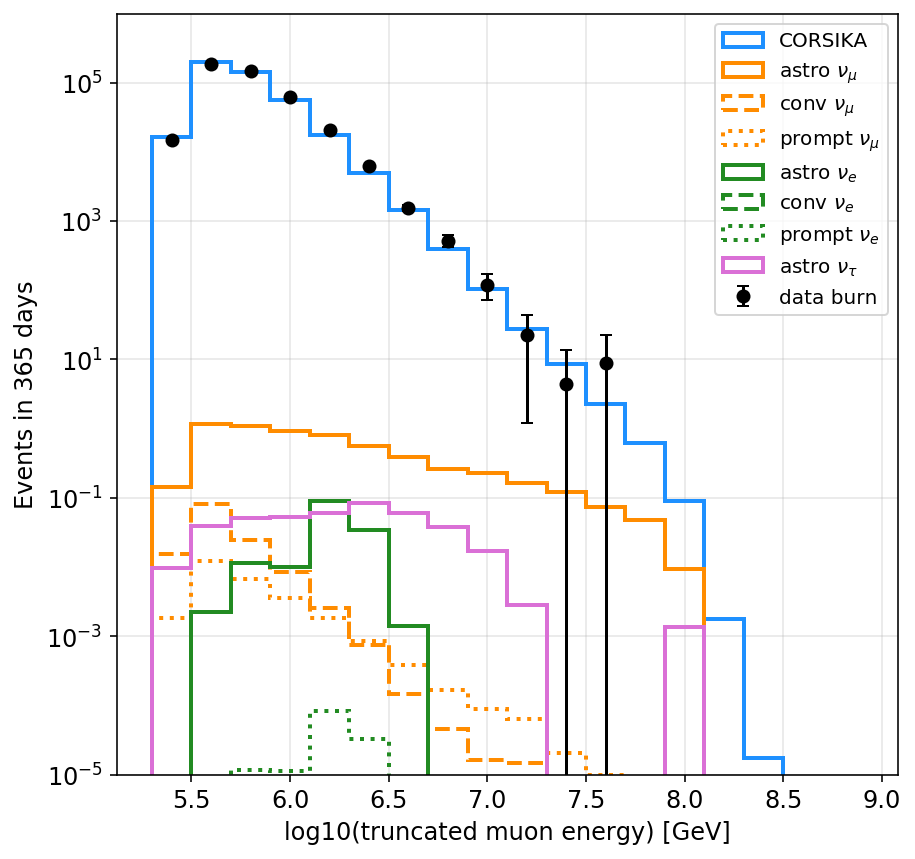

In [201]:
makeplot([np.log10(truncated_muon_e_corsika),
          np.log10(truncated_muon_e_numu),
          np.log10(truncated_muon_e_numu),
          np.log10(truncated_muon_e_numu),
          np.log10(truncated_muon_e_nue),
          np.log10(truncated_muon_e_nue),
          np.log10(truncated_muon_e_nue),
          np.log10(truncated_muon_e_nutau),
          np.log10(truncated_muon_e_data_burn),
        ], mybins = np.arange(5.3,9,0.2), name='log10(truncated muon energy) [GeV]')

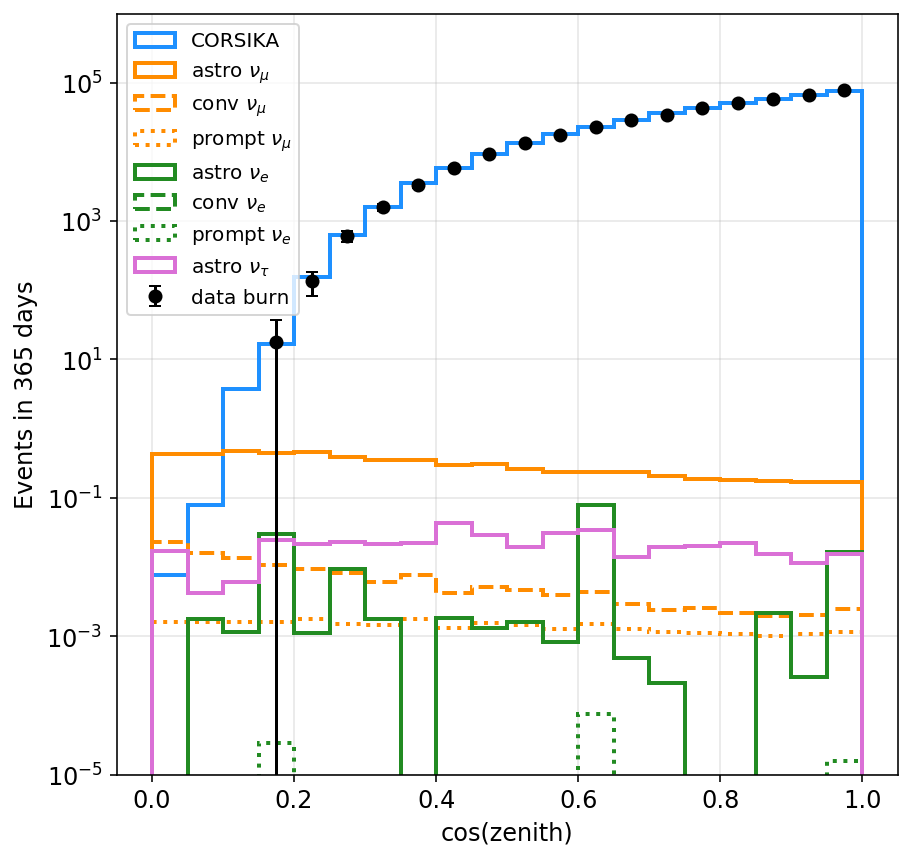

In [202]:
makeplot([np.cos(zenith_corsika),
          np.cos(zenith_numu),
          np.cos(zenith_numu),
          np.cos(zenith_numu),
          np.cos(zenith_nue),
          np.cos(zenith_nue),
          np.cos(zenith_nue),
          np.cos(zenith_nutau),
          np.cos(zenith_data_burn),
        ], mybins = np.arange(0,1.05,0.05), name='cos(zenith)')

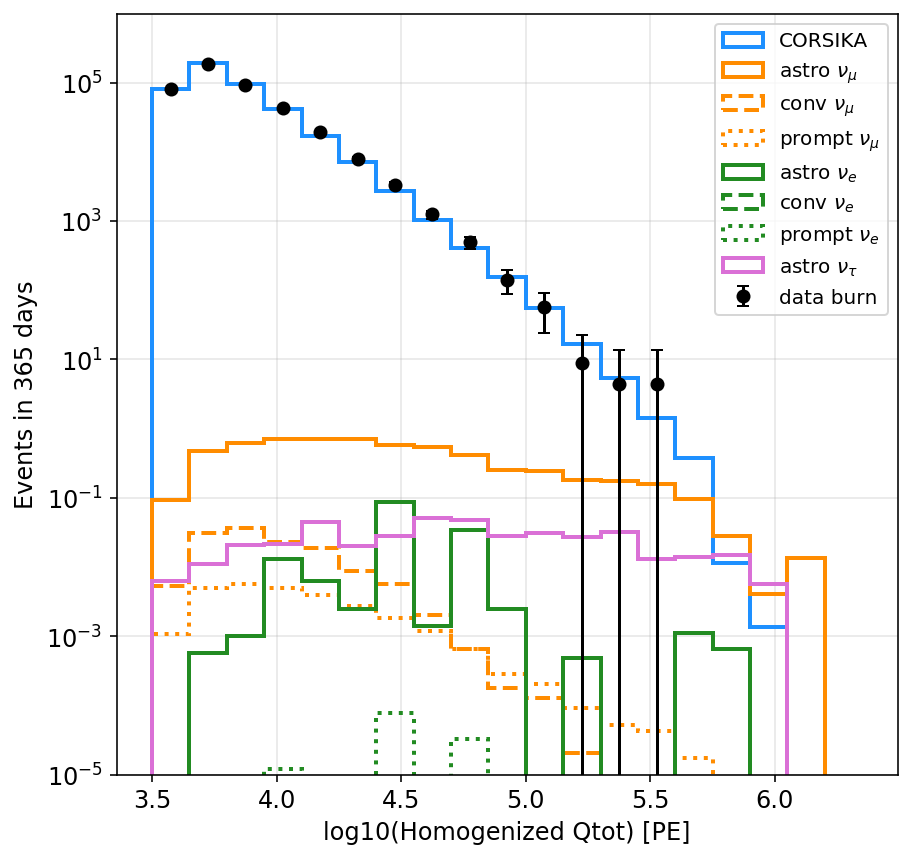

In [203]:
makeplot([np.log10(NPE_corsika),
          np.log10(NPE_numu),
          np.log10(NPE_numu),
          np.log10(NPE_numu),
          np.log10(NPE_nue),
          np.log10(NPE_nue),
          np.log10(NPE_nue),
          np.log10(NPE_nutau),
          np.log10(NPE_data_burn),
        ], mybins = np.arange(3.5,6.5,0.15), name='log10(Homogenized Qtot) [PE]')

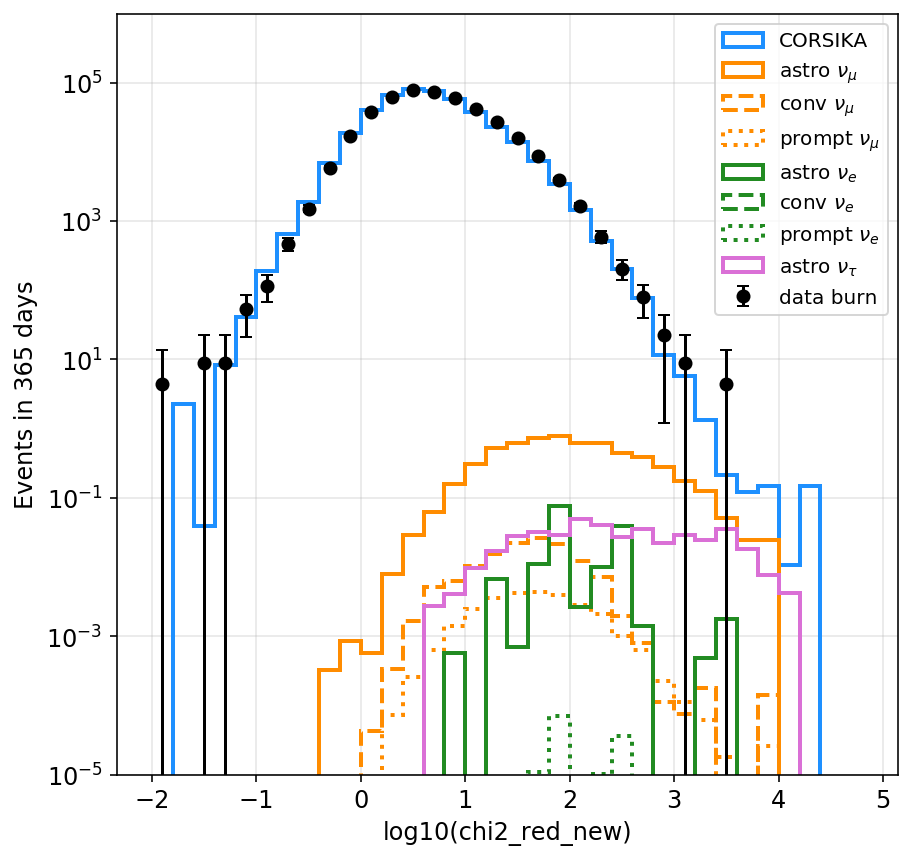

In [204]:
makeplot([np.log10(chi2_red_new_corsika),
          np.log10(chi2_red_new_numu),
          np.log10(chi2_red_new_numu),
          np.log10(chi2_red_new_numu),
          np.log10(chi2_red_new_nue),
          np.log10(chi2_red_new_nue),
          np.log10(chi2_red_new_nue),
          np.log10(chi2_red_new_nutau),
          np.log10(chi2_red_new_data_burn),
        ], mybins = np.arange(-2,5,0.2), name='log10(chi2_red_new)')

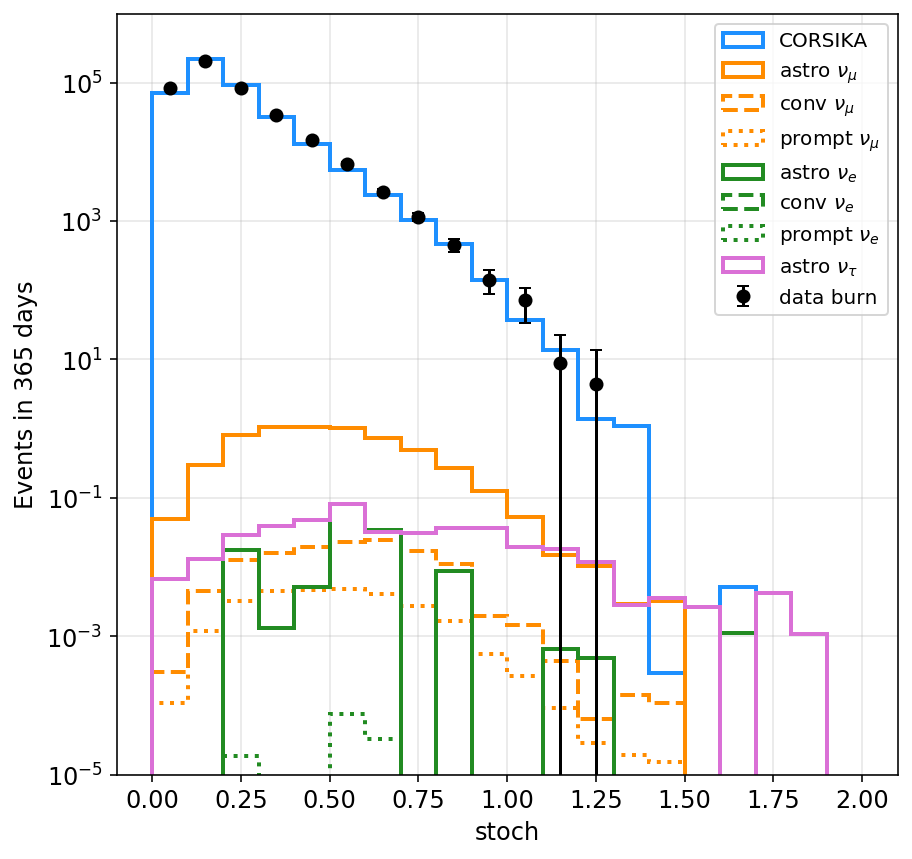

In [205]:
makeplot([stoch_corsika,
          stoch_numu,
          stoch_numu,
          stoch_numu,
          stoch_nue,
          stoch_nue,
          stoch_nue,
          stoch_nutau,
          stoch_data_burn,
        ], mybins = np.arange(0,2.1,0.1), name='stoch')

# bug with coincident events for 11374

In [ ]:
# previous bugs in coincident events

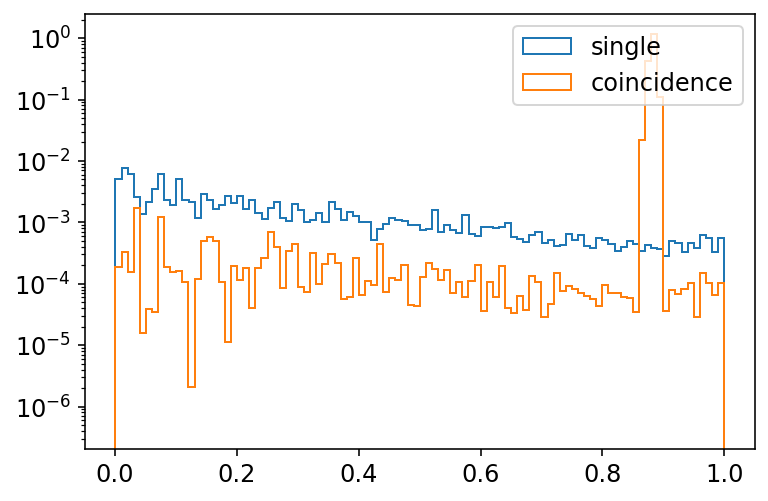

In [71]:
# plt.hist(np.cos(zenith_numu)[coincidence_numu==0],weights=weight_numu_conv[coincidence_numu==0],bins=100,log=True,histtype='step',label='single')
# plt.hist(np.cos(zenith_numu)[coincidence_numu==1],weights=weight_numu_conv[coincidence_numu==1],bins=100,log=True,histtype='step',label='coincidence')
# plt.legend()
# plt.show()

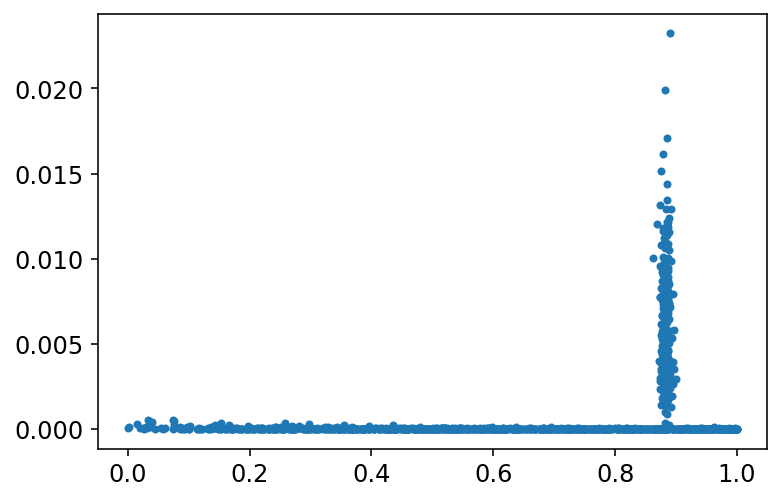

In [134]:
plt.plot(np.cos(zenith_numu),weight_numu_conv,'.')

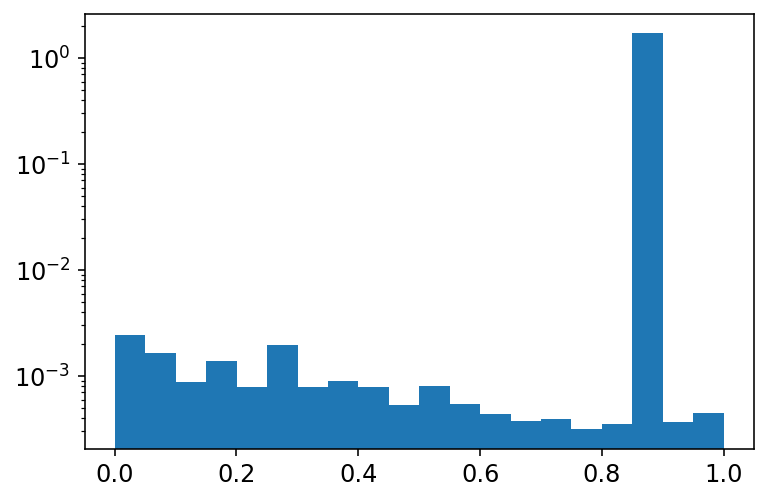

In [144]:
plt.hist(np.cos(zenith_numu),weights=weight_numu_conv,bins=20,log=True)
plt.show()

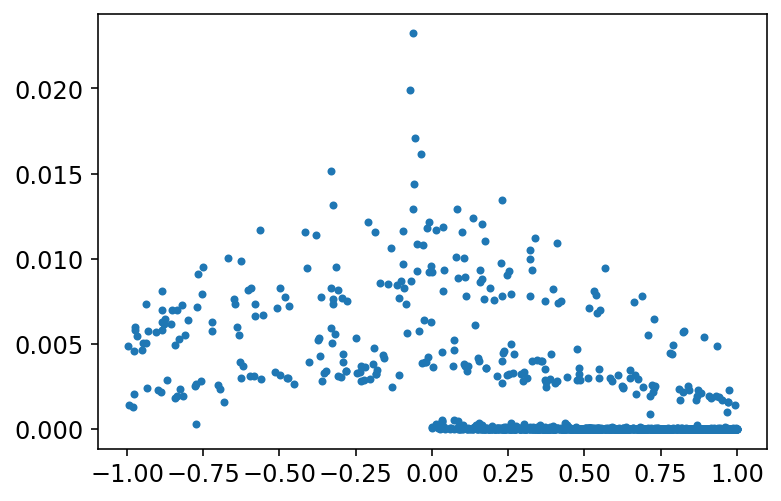

In [135]:
plt.plot(np.cos(zenith_truth_numu),weight_numu_conv,'.')

(array([0.17173292, 0.12549516, 0.12011114, 0.20563547, 0.36888037,
        0.25317084, 0.21884937, 0.11616496, 0.08243434, 0.05930775]),
 array([-0.99654772, -0.79691207, -0.59727642, -0.39764077, -0.19800512,
         0.00163053,  0.20126618,  0.40090183,  0.60053747,  0.80017312,
         0.99980877]),
 <a list of 10 Patch objects>)

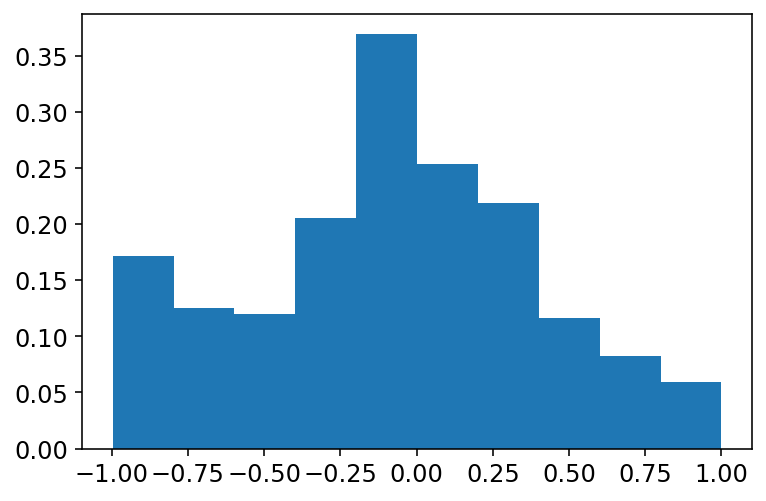

In [138]:
plt.hist(np.cos(zenith_truth_numu),weights=weight_numu_conv,)

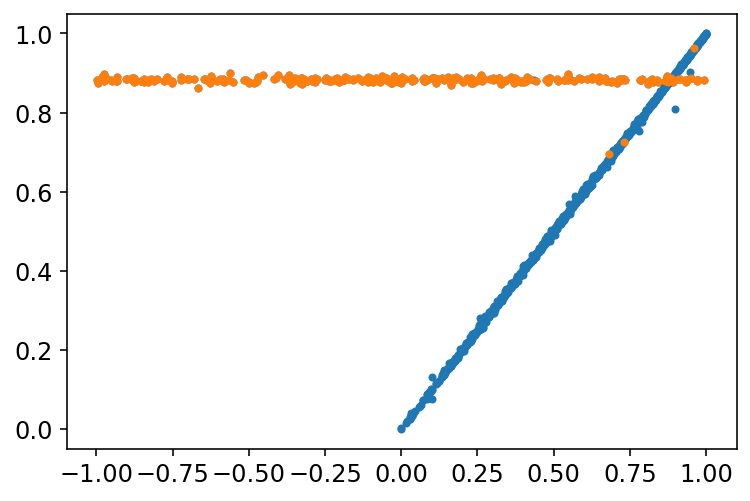

In [176]:
plt.plot(np.cos(zenith_truth_numu),np.cos(zenith_numu),'.')
cut = np.log10(prim_e_numu)<5.
plt.plot(np.cos(zenith_truth_numu)[cut],np.cos(zenith_numu)[cut],'.')
plt.show()

In [150]:
print(*eventid_numu[:20],sep=',')
print(*runid_numu[:20],sep=',')

97664,45104,21680,77941,61704,37358,39195,68327,31296,70793,19044,81626,87926,14561,43462,70262,20200,70982,70596,93816
54.0,68.0,71.0,71.0,81.0,117.0,125.0,139.0,152.0,156.0,161.0,178.0,194.0,249.0,259.0,272.0,277.0,316.0,333.0,337.0


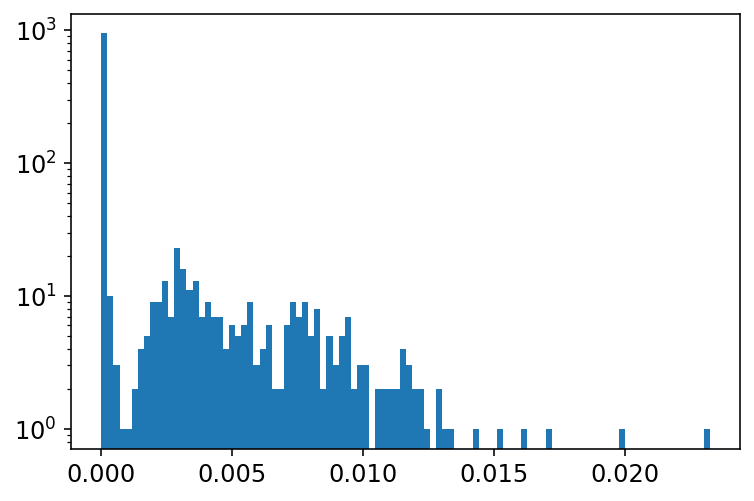

In [154]:
plt.hist(weight_numu_conv,log=True,bins=100)
plt.show()

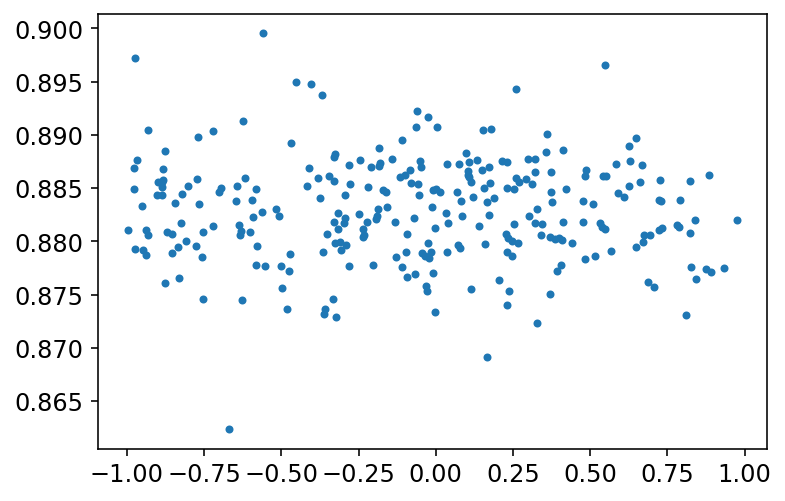

In [157]:
cut = (weight_numu_conv>0.002)
plt.plot(np.cos(zenith_truth_numu)[cut],np.cos(zenith_numu)[cut],'.')

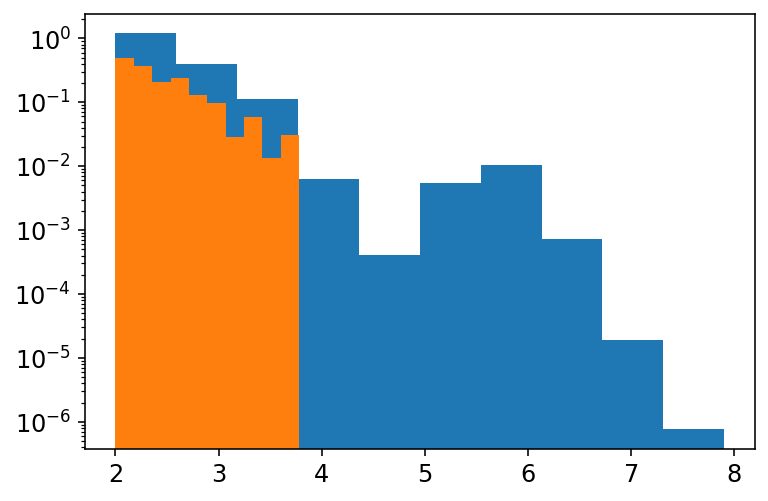

In [164]:
plt.hist(np.log10(prim_e_numu),log=True,weights=weight_numu_conv)
plt.hist(np.log10(prim_e_numu)[cut],log=True,weights=weight_numu_conv[cut])
plt.show()

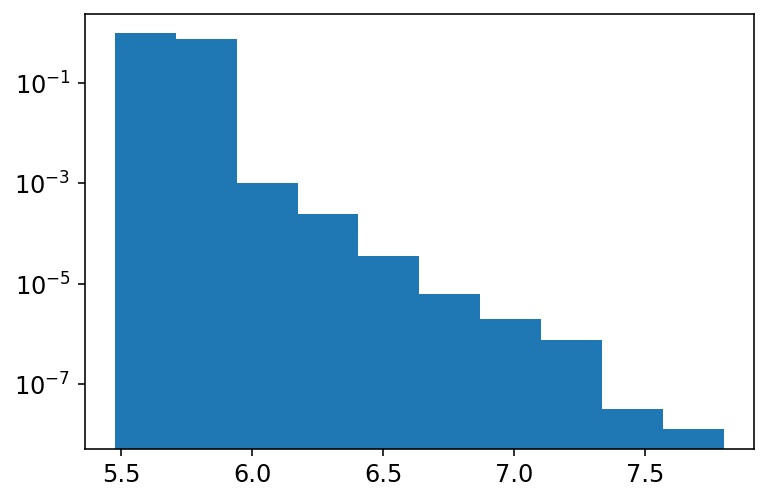

In [162]:
plt.hist(np.log10(truncated_muon_e_numu),log=True,weights=weight_numu_conv)
plt.show()